NLP Project

In [1]:
import numpy as np
import pandas as pd
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv')
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [3]:
# Preprocessing

# Stopwords
stopwords = set(stopwords.words('english'))


# Detokenizer to combines tokens together
detokenizer = TreebankWordDetokenizer()

# Tokenizer and cleaning function
def clean_text(description):
  regex = '([A-Za-z]{2,15}){1}(?! /)'
  description = word_tokenize(description.lower())
  description = [token for token in description if token not in stopwords and token.isalpha()]
  return detokenizer.detokenize(description)


# Apply Function

df["description"] = df["description"].apply(clean_text)
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,aromas include tropical fruit broom brimstone ...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,ripe fruity wine smooth still structured firm ...,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [4]:
df.shape

(129971, 14)

In [5]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [6]:
df.isnull().values.sum()

204752

# Data Preprocessing - Price

In [7]:
# dropping missing values in price

df = df.dropna(subset=['price'])
df['price'].isnull().sum()

0

<AxesSubplot:xlabel='price'>

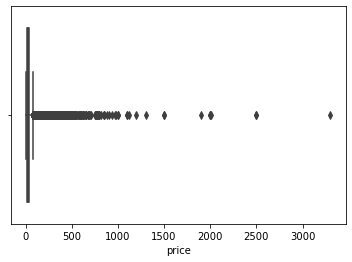

In [8]:
#Checking the outliers

sns.boxplot(df['price'])

In [9]:
# dropping Outliers


df=df[df['price'] <=900]

<AxesSubplot:xlabel='price'>

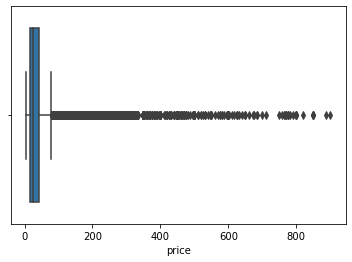

In [10]:
sns.boxplot(df['price'])

In [11]:
#Categorize wines into Cheap vs Expensive
def get_price_range(price):
    if(price <= 15):
        return 'Cheap' 
    else:
        return 'Expensive'
    

df['price_range'] = df['price'].apply(get_price_range)

df.groupby(df['price_range']).size()

price_range
Cheap        25102
Expensive    95854
dtype: int64

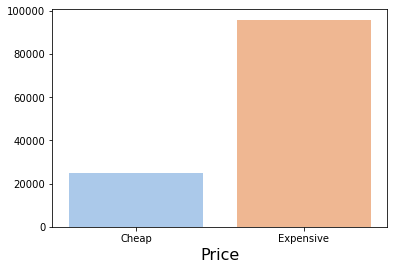

In [13]:
result = df.groupby(df['price_range']).size()
sns.barplot(x = result.index, y = result.values, palette='pastel')
plt.xlabel("Price", fontsize=16)
plt.savefig('Price.png') 

## Word Cloud

In [14]:
df2=df[df['price']<= 15]
df3= df[df['price']> 15]
df3.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_range
4,4,US,much like regular bottling comes across rather...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Expensive
6,6,Italy,bright informal red opens aromas candied berry...,Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,Expensive


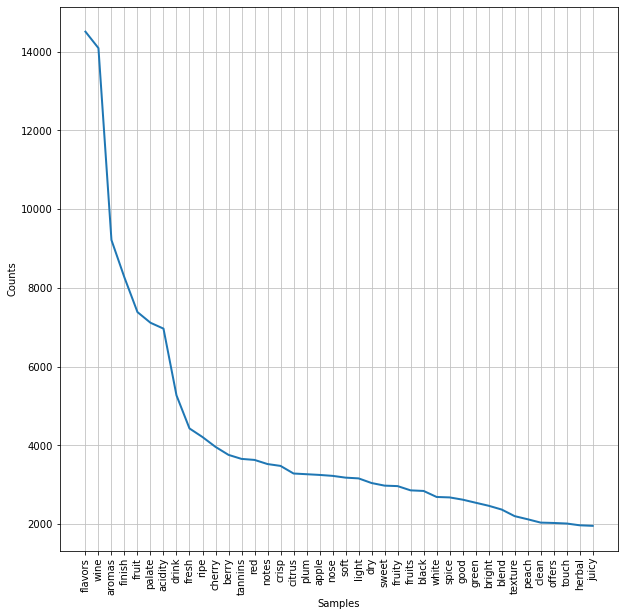

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist

text = " ".join(review for review in df2.description)
#print ("There are {} words in the combination of all review.".format(len(text)))

tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)

plt.figure(figsize=(10, 10))
freq = FreqDist(tokens)
freq.plot(40)

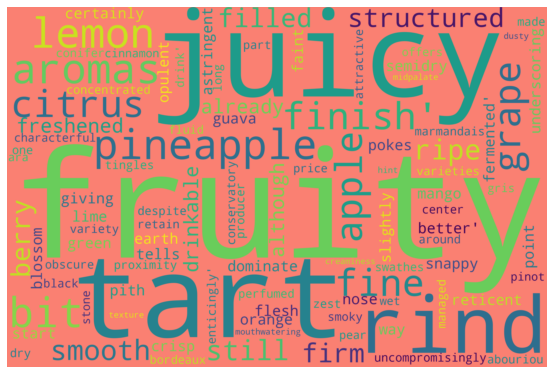

In [16]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["wine", "flavors","fruit","notes","finish","palate","fruits","acidity","tannins","red",])




text = df2.description.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color='salmon',
    stopwords = stopwords).generate(str(text))
fig = plt.figure(
    figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

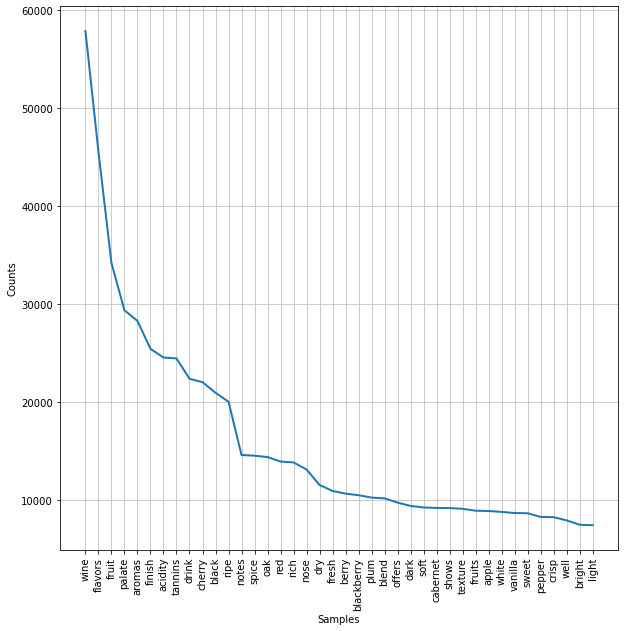

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
#Expensive Wines


text = " ".join(review for review in df3.description)
#print ("There are {} words in the combination of all review.".format(len(text)))

tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)

plt.figure(figsize=(10, 10))
freq = FreqDist(tokens)
freq.plot(40)

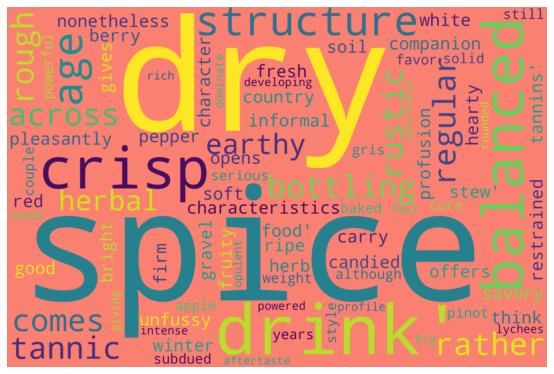

In [18]:
stopwords = set(STOPWORDS)
stopwords.update(["wine", "flavors","fruit","notes","finish","palate","drink","finish","nose","tannins",
                  "aromas","much","texture","acidity","structure""drink"])


text = df3.description.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color='salmon',
    stopwords = stopwords).generate(str(text))
fig = plt.figure(
    figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Models

In [19]:
# Select only relevant columns
df = df[["description", "price_range"]]
df.head(2)

,description,price_range
1,ripe fruity wine smooth still structured firm ...,Cheap
2,tart snappy flavors lime flesh rind dominate g...,Cheap


In [20]:
def get_vector_feature_matrix(description):
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english", max_features=3000)
    vectorizer = CountVectorizer(lowercase=True, stop_words="english",ngram_range=(1,2), max_features=3000, max_df=0.9, min_df=10) #use most common 2000 words to make a prediction
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english", tokenizer=stemming_tokenizer) 
    vector = vectorizer.fit_transform(description)
    return vector, vectorizer

In [21]:
vector, vectorizer = get_vector_feature_matrix(df['description'])

In [22]:
#print(vectorizer.get_feature_names())

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['price_range'] = labelencoder.fit_transform(df['price_range'])

In [24]:
features=vector
label = df['price_range']

In [25]:
# Splitting the data into the training and test 70/30
X, y = features, label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
y_train.value_counts()

1    67053
0    17616
Name: price_range, dtype: int64

### We have an imbalanced dataset. We used oversampling and undersampling to address this issue, but the accuracy dropped. So we decided not to use These techniques. 

# Logistic Regression

In [27]:
# Logistic Regresson Model

lr = LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr_model = lr.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)


report_lr = classification_report(y_test, pred_lr, output_dict=True)
df_lr = pd.DataFrame(report_lr).transpose().round(4)
df_lr

,precision,recall,f1-score,support
0,0.6095,0.4156,0.4942,7486.0000
1,0.8597,0.9308,0.8938,28801.0000
accuracy,0.8245,0.8245,0.8245,0.8245
macro avg,0.7346,0.6732,0.6940,36287.0000
weighted avg,0.8081,0.8245,0.8114,36287.0000


In [28]:
accuracy_lr = accuracy_score(y_test, pred_lr)
print ("Logistic Regression Classifier Accuracy is {}".format(accuracy_lr))

Logistic Regression Classifier Accuracy is 0.8245101551519828


# Decision Tree

In [29]:
# Decision Tree Model 

tree = DecisionTreeClassifier()
tree_model=tree.fit(X_train, y_train)
pred_tree = tree_model.predict(X_test)

report_tree = classification_report(y_test, pred_tree, output_dict=True)
df_tree = pd.DataFrame(report_tree).transpose().round(4)
df_tree

,precision,recall,f1-score,support
0,0.4465,0.4256,0.4358,7486.0000
1,0.8525,0.8629,0.8577,28801.0000
accuracy,0.7727,0.7727,0.7727,0.7727
macro avg,0.6495,0.6442,0.6467,36287.0000
weighted avg,0.7687,0.7727,0.7706,36287.0000


In [30]:
accuracy_tree = accuracy_score(y_test, pred_tree)
print ("Decision Tree Classifier Accuracy is {}".format(accuracy_tree))

Decision Tree Classifier Accuracy is 0.7726734092099099


# Random Forest

In [31]:
# Random Forest Model

rf = RandomForestClassifier(n_estimators=400)
rf_model=rf.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)


report_rf = classification_report(y_test, pred_rf, output_dict=True)
df_rf = pd.DataFrame(report_rf).transpose().round(4)
df_rf

,precision,recall,f1-score,support
0,0.7867,0.2725,0.4048,7486.0000
1,0.8384,0.9808,0.9040,28801.0000
accuracy,0.8347,0.8347,0.8347,0.8347
macro avg,0.8126,0.6267,0.6544,36287.0000
weighted avg,0.8277,0.8347,0.8010,36287.0000


In [32]:
accuracy_rf = accuracy_score(y_test,pred_rf)
print ("Random forest Classifier Accuracy is {}".format(accuracy_rf))

Random forest Classifier Accuracy is 0.8346790861741119


# Results

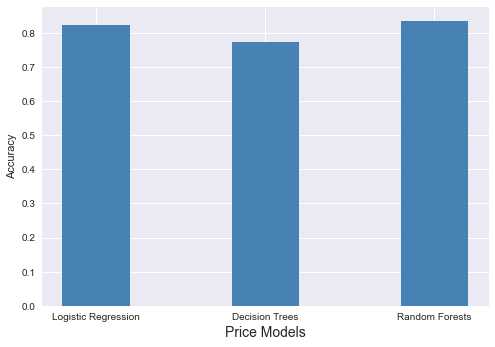

In [33]:
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

accs = [accuracy_lr, accuracy_tree, accuracy_rf]
models = ["Logistic Regression", "Decision Trees", "Random Forests"]
plt.bar(models, accs, width = 0.4, color= 'steelblue')
plt.xlabel("Price Models", fontsize=14)
plt.ylabel("Accuracy")
plt.show()

In [34]:
df_rf_compare = df_rf.loc[['0','1'],'recall'].to_frame()
df_rf_compare.rename(columns = ({'recall' : 'Random Forest Recall'}), inplace = True)

df_tree_compare = df_tree.loc[['0','1'],'recall'].to_frame()
df_tree_compare.rename(columns = ({'recall' : 'Decision Tree Recall'}), inplace = True)

df_lr_compare = df_lr.loc[['0','1'],'recall'].to_frame()
df_lr_compare.rename(columns = ({'recall' : 'Logistic Regression Recall'}), inplace = True)

recall = df_rf_compare.merge(df_tree_compare, left_index = True, right_index = True)
recall = recall.merge(df_lr_compare, left_index = True, right_index = True)
recall = recall.transpose()
recall.reset_index(inplace=True)
recall

,index,0,1
0,Random Forest Recall,0.2725,0.9808
1,Decision Tree Recall,0.4256,0.8629
2,Logistic Regression Recall,0.4156,0.9308


In [36]:
#!pip install plotly_express
import plotly_express as px

fig = px.histogram(recall, x=["0", '1'],y = "index",
             barmode='group',
             height=400, title = 'Price Recall')

fig.show()
